# **Reason vs. Belief: How Humans Respond to Conflicts between Science and Religion**

Team members: Victor Chen, Carlie McCleary, Frank Staszak, and Joe Houck 
Abstract: In this project, we analyze how a person's demographic, professional, and socioeconomic backgrounds and behavioral traits may predict how (s)he responds to conflicts between science and religious belief. The outcome is a measure between 0 and 1, suggesting the extent to which a person (dis)agrees that religion is above science when they conflicts (0 being most strongly disagree and 1 being most strongly agree).
---



![1_7kIlZW9rXIpp79aZZc3pCQ[1].png](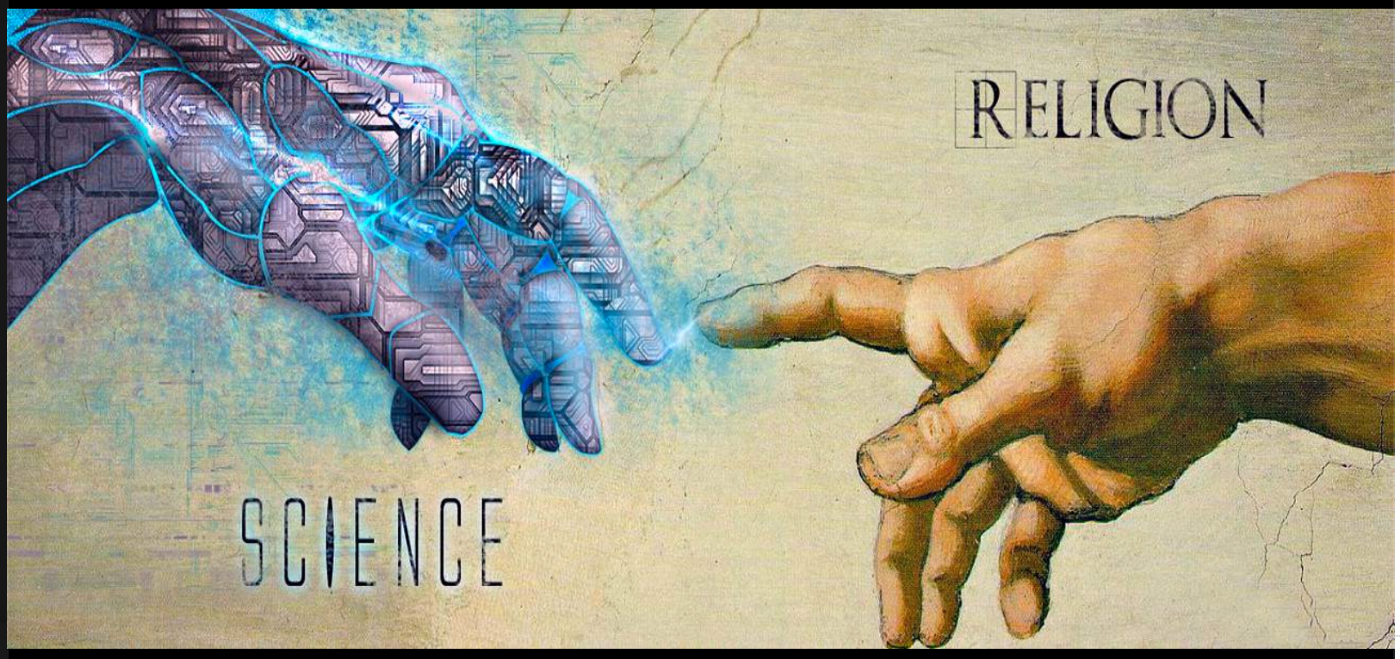)

## **Data Collection and Preparation**

Data is collected from the [World Values Survey](https://www.worldvaluessurvey.org/wvs.jsp), which contains over 500 survey questions and answers collected from almost half a million citizens around the world since 1981.

In [36]:
# load basic packages
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.options.display.float_format = '{:,.3f}'.format

# load visualization packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
colors = sns.color_palette()

!pip install -U graphviz

In [37]:
# load data with outcome (F202) and shortlisted features
df = pd.read_csv('https://www.dropbox.com/s/9tb6a5vfyfny753/WVS_TimeSeries_1981_2020_stata_v2_0_shortlisted.csv?dl=1')

df['Religion_over_science'] = df['F202']
df = df.drop(['F202'], axis=1)

In [38]:
# Change invalid values (<=) to None, and remove columns with only invalid values.
cols_drop = []
for i in df.columns:
    if df[i].max()<0:
        cols_drop.append(str(i))
if 'Religion_over_science' in cols_drop:
  cols_drop.remove('Religion_over_science')
df = df.drop(cols_drop, axis=1)
df = df.mask(df < 0)

# Remove volumns with less than 100,000 rows
cols_drop = []
for i in df.columns:
    if df[i].count()<=100000:
        cols_drop.append(str(i))
if 'Religion_over_science' in cols_drop:
  cols_drop.remove('Religion_over_science')
df = df.drop(cols_drop, axis=1)

# Drop rows with NA
df = df.dropna()

# X002 (birth year) and X003 (age) duplicate
df = df.drop(['X002'], axis=1)

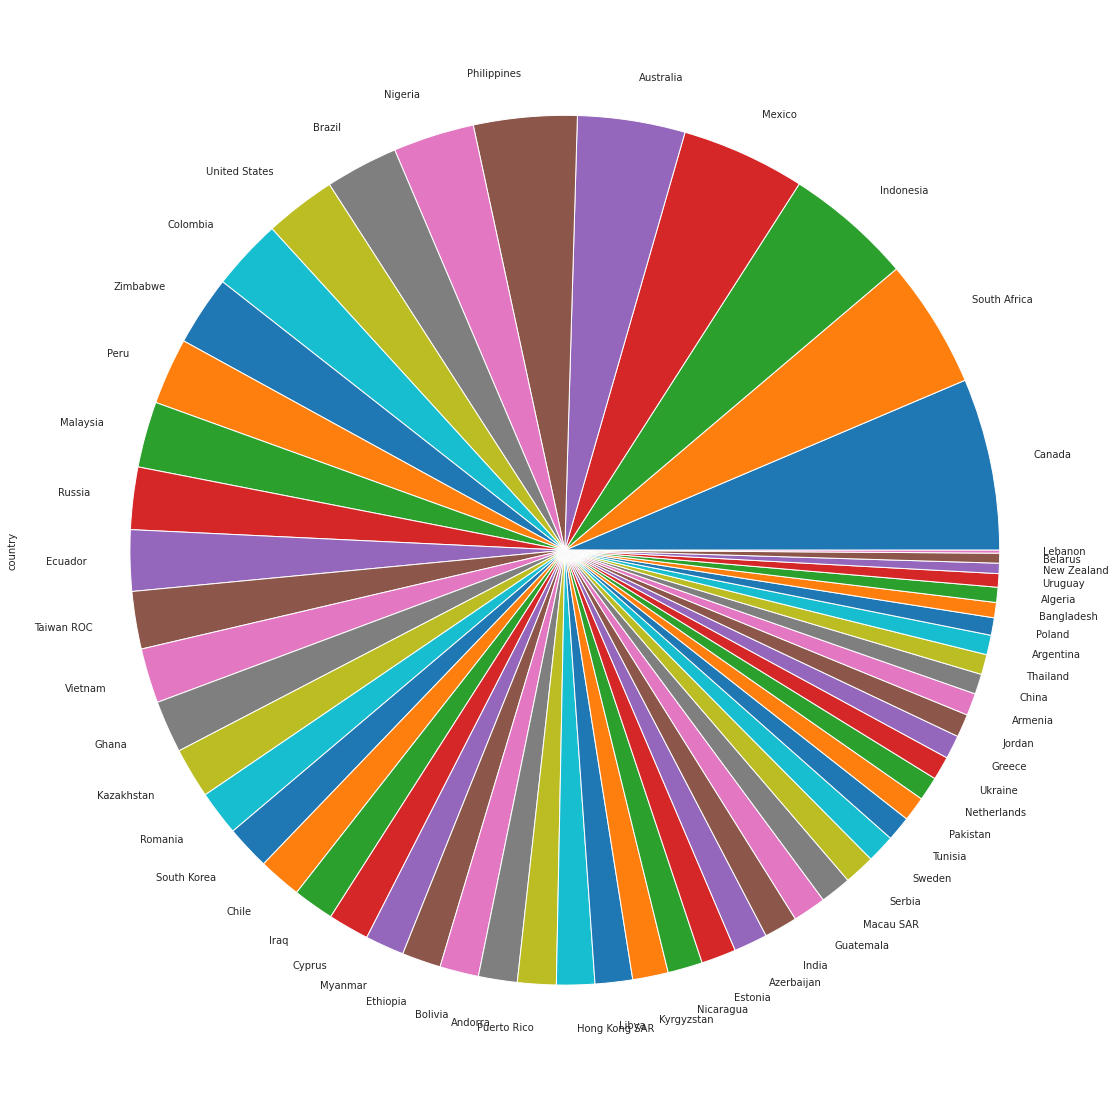

In [39]:
# Convert country code (S003) to country name, and drop S003

df['country'] = None
df.loc[df['S003']==8,'country'] ="Albania"
df.loc[df['S003']==12,'country'] ="Algeria"
df.loc[df['S003']==20,'country'] ="Andorra"
df.loc[df['S003']==31,'country'] ="Azerbaijan"
df.loc[df['S003']==32,'country'] ="Argentina"
df.loc[df['S003']==36,'country'] ="Australia"
df.loc[df['S003']==50,'country'] ="Bangladesh"
df.loc[df['S003']==51,'country'] ="Armenia"
df.loc[df['S003']==68,'country'] ="Bolivia"
df.loc[df['S003']==70,'country'] ="Bosnia Herzegovina"
df.loc[df['S003']==76,'country'] ="Brazil"
df.loc[df['S003']==100,'country'] ="Bulgaria"
df.loc[df['S003']==104,'country'] ="Myanmar"
df.loc[df['S003']==112,'country'] ="Belarus"
df.loc[df['S003']==124,'country'] ="Canada"
df.loc[df['S003']==152,'country'] ="Chile"
df.loc[df['S003']==156,'country'] ="China"
df.loc[df['S003']==158,'country'] ="Taiwan ROC"
df.loc[df['S003']==170,'country'] ="Colombia"
df.loc[df['S003']==191,'country'] ="Croatia"
df.loc[df['S003']==196,'country'] ="Cyprus"
df.loc[df['S003']==203,'country'] ="Czech Rep."
df.loc[df['S003']==214,'country'] ="Dominican Rep."
df.loc[df['S003']==218,'country'] ="Ecuador"
df.loc[df['S003']==222,'country'] ="El Salvador"
df.loc[df['S003']==231,'country'] ="Ethiopia"
df.loc[df['S003']==233,'country'] ="Estonia"
df.loc[df['S003']==246,'country'] ="Finland"
df.loc[df['S003']==250,'country'] ="France"
df.loc[df['S003']==268,'country'] ="Georgia"
df.loc[df['S003']==275,'country'] ="Palestine"
df.loc[df['S003']==276,'country'] ="Germany"
df.loc[df['S003']==288,'country'] ="Ghana"
df.loc[df['S003']==300,'country'] ="Greece"
df.loc[df['S003']==320,'country'] ="Guatemala"
df.loc[df['S003']==332,'country'] ="Haiti"
df.loc[df['S003']==344,'country'] ="Hong Kong SAR"
df.loc[df['S003']==348,'country'] ="Hungary"
df.loc[df['S003']==356,'country'] ="India"
df.loc[df['S003']==360,'country'] ="Indonesia"
df.loc[df['S003']==364,'country'] ="Iran"
df.loc[df['S003']==368,'country'] ="Iraq"
df.loc[df['S003']==376,'country'] ="Israel"
df.loc[df['S003']==380,'country'] ="Italy"
df.loc[df['S003']==392,'country'] ="Japan"
df.loc[df['S003']==398,'country'] ="Kazakhstan"
df.loc[df['S003']==400,'country'] ="Jordan"
df.loc[df['S003']==410,'country'] ="South Korea"
df.loc[df['S003']==414,'country'] ="Kuwait"
df.loc[df['S003']==417,'country'] ="Kyrgyzstan"
df.loc[df['S003']==422,'country'] ="Lebanon"
df.loc[df['S003']==428,'country'] ="Latvia"
df.loc[df['S003']==434,'country'] ="Libya"
df.loc[df['S003']==440,'country'] ="Lithuania"
df.loc[df['S003']==446,'country'] ="Macau SAR"
df.loc[df['S003']==458,'country'] ="Malaysia"
df.loc[df['S003']==466,'country'] ="Mali"
df.loc[df['S003']==484,'country'] ="Mexico"
df.loc[df['S003']==498,'country'] ="Moldova"
df.loc[df['S003']==499,'country'] ="Montenegro"
df.loc[df['S003']==504,'country'] ="Morocco"
df.loc[df['S003']==528,'country'] ="Netherlands"
df.loc[df['S003']==554,'country'] ="New Zealand"
df.loc[df['S003']==558,'country'] ="Nicaragua"
df.loc[df['S003']==566,'country'] ="Nigeria"
df.loc[df['S003']==578,'country'] ="Norway"
df.loc[df['S003']==586,'country'] ="Pakistan"
df.loc[df['S003']==604,'country'] ="Peru"
df.loc[df['S003']==608,'country'] ="Philippines"
df.loc[df['S003']==616,'country'] ="Poland"
df.loc[df['S003']==630,'country'] ="Puerto Rico"
df.loc[df['S003']==634,'country'] ="Qatar"
df.loc[df['S003']==642,'country'] ="Romania"
df.loc[df['S003']==643,'country'] ="Russia"
df.loc[df['S003']==646,'country'] ="Rwanda"
df.loc[df['S003']==682,'country'] ="Saudi Arabia"
df.loc[df['S003']==688,'country'] ="Serbia"
df.loc[df['S003']==702,'country'] ="Singapore"
df.loc[df['S003']==703,'country'] ="Slovakia"
df.loc[df['S003']==704,'country'] ="Vietnam"
df.loc[df['S003']==705,'country'] ="Slovenia"
df.loc[df['S003']==710,'country'] ="South Africa"
df.loc[df['S003']==716,'country'] ="Zimbabwe"
df.loc[df['S003']==724,'country'] ="Spain"
df.loc[df['S003']==752,'country'] ="Sweden"
df.loc[df['S003']==756,'country'] ="Switzerland"
df.loc[df['S003']==762,'country'] ="Tajikistan"
df.loc[df['S003']==764,'country'] ="Thailand"
df.loc[df['S003']==780,'country'] ="Trinidad and Tobago"
df.loc[df['S003']==788,'country'] ="Tunisia"
df.loc[df['S003']==792,'country'] ="Turkey"
df.loc[df['S003']==800,'country'] ="Uganda"
df.loc[df['S003']==804,'country'] ="Ukraine"
df.loc[df['S003']==807,'country'] ="North Macedonia"
df.loc[df['S003']==818,'country'] ="Egypt"
df.loc[df['S003']==826,'country'] ="United Kingdom"
df.loc[df['S003']==834,'country'] ="Tanzania"
df.loc[df['S003']==840,'country'] ="United States"
df.loc[df['S003']==854,'country'] ="Burkina Faso"
df.loc[df['S003']==858,'country'] ="Uruguay"
df.loc[df['S003']==860,'country'] ="Uzbekistan"
df.loc[df['S003']==862,'country'] ="Venezuela"
df.loc[df['S003']==887,'country'] ="Yemen"
df.loc[df['S003']==894,'country'] ="Zambia"
df = df.drop(['S003'], axis=1)
df['country'].value_counts().plot(kind='pie',  figsize=(20,20))

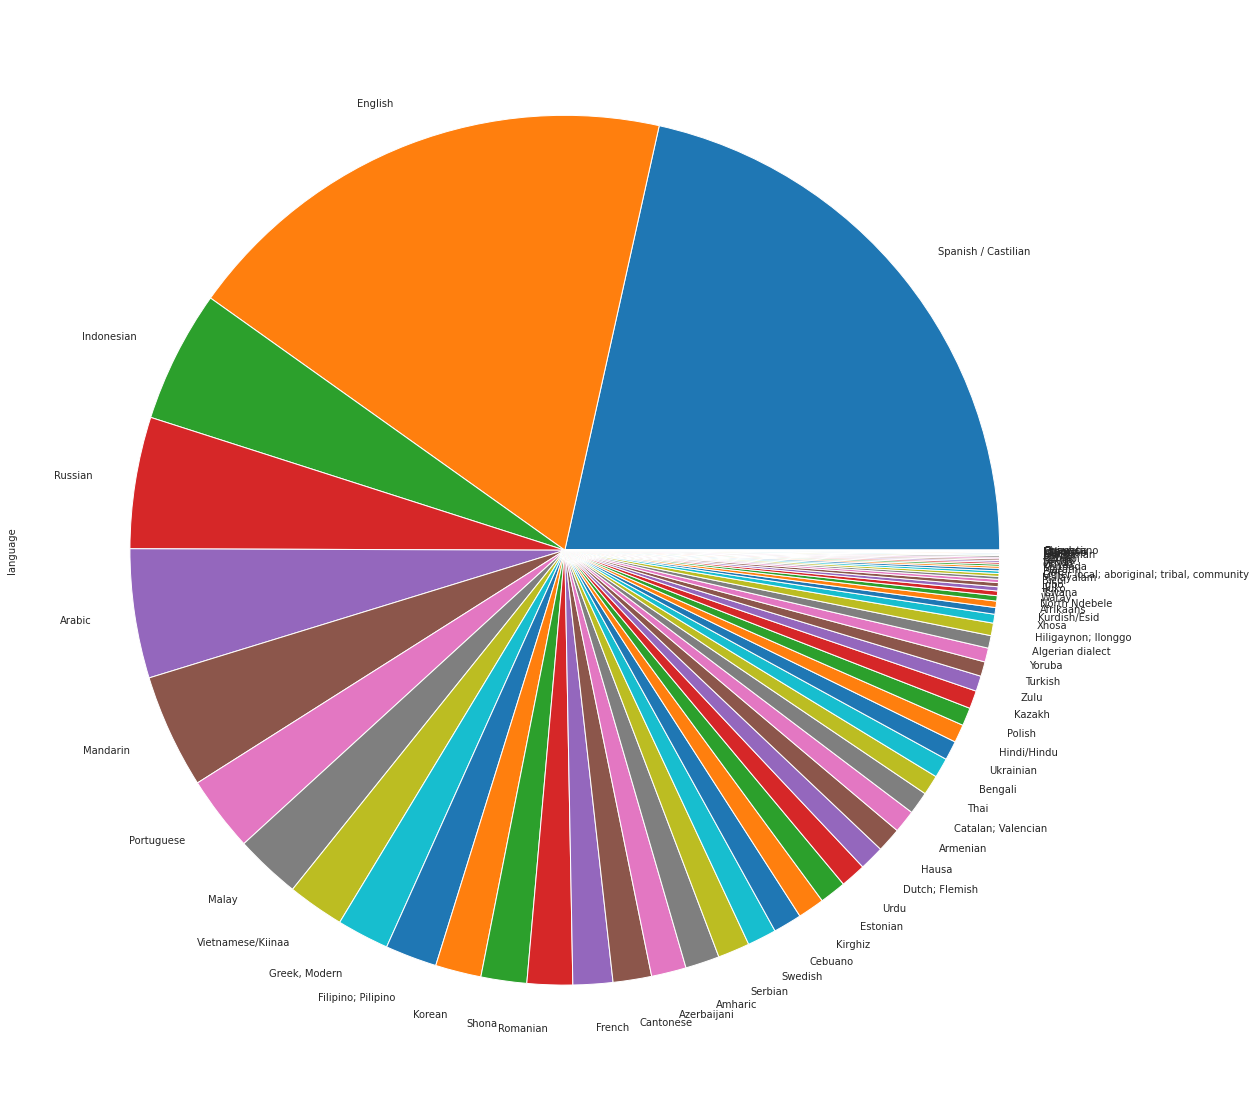

In [40]:
# Convert language code (S016B) to language name, and drop S016B and G016 (Language at home)

df['language']=None
df.loc[df['S016B']==40,'language'] ="Afrikaans"
df.loc[df['S016B']==100,'language'] ="Albanian"
df.loc[df['S016B']==110,'language'] ="Algerian dialect"
df.loc[df['S016B']==130,'language'] ="Amazigh"
df.loc[df['S016B']==140,'language'] ="Amharic"
df.loc[df['S016B']==170,'language'] ="Arabic"
df.loc[df['S016B']==200,'language'] ="Armenian"
df.loc[df['S016B']==220,'language'] ="Assamese"
df.loc[df['S016B']==240,'language'] ="Ateso"
df.loc[df['S016B']==290,'language'] ="Aymara"
df.loc[df['S016B']==310,'language'] ="Azerbaijani"
df.loc[df['S016B']==370,'language'] ="Baluchi"
df.loc[df['S016B']==380,'language'] ="Bamanakan"
df.loc[df['S016B']==390,'language'] ="Bambara"
df.loc[df['S016B']==420,'language'] ="Barahvi"
df.loc[df['S016B']==440,'language'] ="Basque"
df.loc[df['S016B']==480,'language'] ="Bemba"
df.loc[df['S016B']==490,'language'] ="Bengali"
df.loc[df['S016B']==500,'language'] ="Berber"
df.loc[df['S016B']==550,'language'] ="Bicol"
df.loc[df['S016B']==670,'language'] ="Bosnian"
df.loc[df['S016B']==680,'language'] ="Brahui"
df.loc[df['S016B']==720,'language'] ="Bulgarian"
df.loc[df['S016B']==790,'language'] ="Cantonese"
df.loc[df['S016B']==810,'language'] ="Catalan; Valencian"
df.loc[df['S016B']==820,'language'] ="Cebuano"
df.loc[df['S016B']==850,'language'] ="Chavacano"
df.loc[df['S016B']==920,'language'] ="Chinese"
df.loc[df['S016B']==930,'language'] ="Chinese dialects"
df.loc[df['S016B']==1020,'language'] ="Creoles and Pidgins"
df.loc[df['S016B']==1030,'language'] ="Croatian"
df.loc[df['S016B']==1080,'language'] ="Dagbani"
df.loc[df['S016B']==1140,'language'] ="Dioula"
df.loc[df['S016B']==1160,'language'] ="Dogon"
df.loc[df['S016B']==1190,'language'] ="Dutch; Flemish"
df.loc[df['S016B']==1240,'language'] ="English"
df.loc[df['S016B']==1260,'language'] ="Esan"
df.loc[df['S016B']==1270,'language'] ="Spanish / Castilian"
df.loc[df['S016B']==1290,'language'] ="Estonian"
df.loc[df['S016B']==1300,'language'] ="Ewe"
df.loc[df['S016B']==1360,'language'] ="Filipino; Pilipino"
df.loc[df['S016B']==1380,'language'] ="Foulfoulde"
df.loc[df['S016B']==1400,'language'] ="French"
df.loc[df['S016B']==1430,'language'] ="Ga"
df.loc[df['S016B']==1460,'language'] ="Gallegan"
df.loc[df['S016B']==1520,'language'] ="Georgian"
df.loc[df['S016B']==1530,'language'] ="German"
df.loc[df['S016B']==1540,'language'] ="Gilaki"
df.loc[df['S016B']==1580,'language'] ="Greek, Modern"
df.loc[df['S016B']==1610,'language'] ="Gujarati"
df.loc[df['S016B']==1670,'language'] ="Hakka"
df.loc[df['S016B']==1700,'language'] ="Hausa"
df.loc[df['S016B']==1730,'language'] ="Hiligaynon; Ilonggo"
df.loc[df['S016B']==1740,'language'] ="Hindi/Hindu"
df.loc[df['S016B']==1770,'language'] ="Hungarian"
df.loc[df['S016B']==1850,'language'] ="Igbo"
df.loc[df['S016B']==1880,'language'] ="Iluko"
df.loc[df['S016B']==1890,'language'] ="Indonesian"
df.loc[df['S016B']==1990,'language'] ="Italian"
df.loc[df['S016B']==2020,'language'] ="Japanese"
df.loc[df['S016B']==2040,'language'] ="Jewish"
df.loc[df['S016B']==2140,'language'] ="Kannada"
df.loc[df['S016B']==2160,'language'] ="Kaonde"
df.loc[df['S016B']==2230,'language'] ="Kazakh"
df.loc[df['S016B']==2300,'language'] ="Kinyarwanda; Rwandese"
df.loc[df['S016B']==2310,'language'] ="Kirghiz"
df.loc[df['S016B']==2390,'language'] ="Korean"
df.loc[df['S016B']==2420,'language'] ="Kurdish/Esid"
df.loc[df['S016B']==2490,'language'] ="Lanna"
df.loc[df['S016B']==2620,'language'] ="Lozi"
df.loc[df['S016B']==2640,'language'] ="Luganda"
df.loc[df['S016B']==2650,'language'] ="Lumasaba"
df.loc[df['S016B']==2670,'language'] ="Luri/Lori"
df.loc[df['S016B']==2680,'language'] ="Lusania"
df.loc[df['S016B']==2690,'language'] ="Lusoga"
df.loc[df['S016B']==2720,'language'] ="Lwo"
df.loc[df['S016B']==2730,'language'] ="Macedonian"
df.loc[df['S016B']==2810,'language'] ="Malay"
df.loc[df['S016B']==2820,'language'] ="Malayalam"
df.loc[df['S016B']==2830,'language'] ="Malinke"
df.loc[df['S016B']==2870,'language'] ="Mandarin"
df.loc[df['S016B']==2880,'language'] ="Mandarin and Hakka"
df.loc[df['S016B']==2890,'language'] ="Mandarin and Taiwanese"
df.loc[df['S016B']==2930,'language'] ="Maranao"
df.loc[df['S016B']==2940,'language'] ="Marathi"
df.loc[df['S016B']==3040,'language'] ="Montenegrin"
df.loc[df['S016B']==3070,'language'] ="More"
df.loc[df['S016B']==3160,'language'] ="Ndebele"
df.loc[df['S016B']==3200,'language'] ="North Ndebele"
df.loc[df['S016B']==3230,'language'] ="Northern Sotho, Pedi; Sepedi"
df.loc[df['S016B']==3240,'language'] ="Norwegian"
df.loc[df['S016B']==3300,'language'] ="Nyanja"
df.loc[df['S016B']==3380,'language'] ="Oriya"
df.loc[df['S016B']==3460,'language'] ="Panjabi, Punjabi"
df.loc[df['S016B']==3490,'language'] ="Persian;Dari"
df.loc[df['S016B']==3500,'language'] ="Peul"
df.loc[df['S016B']==3510,'language'] ="Pidgin English"
df.loc[df['S016B']==3520,'language'] ="Polish"
df.loc[df['S016B']==3530,'language'] ="Portuguese"
df.loc[df['S016B']==3540,'language'] ="Punjabi"
df.loc[df['S016B']==3550,'language'] ="Pushto"
df.loc[df['S016B']==3570,'language'] ="Quechua"
df.loc[df['S016B']==3580,'language'] ="Romanian"
df.loc[df['S016B']==3600,'language'] ="Romansh"
df.loc[df['S016B']==3630,'language'] ="Russian"
df.loc[df['S016B']==3650,'language'] ="Rutoro"
df.loc[df['S016B']==3720,'language'] ="Saraiki"
df.loc[df['S016B']==3770,'language'] ="Senoufo"
df.loc[df['S016B']==3780,'language'] ="Serbian"
df.loc[df['S016B']==3790,'language'] ="Serbo-Croatian"
df.loc[df['S016B']==3830,'language'] ="Shona"
df.loc[df['S016B']==3860,'language'] ="Sindhi"
df.loc[df['S016B']==3930,'language'] ="Soninke"
df.loc[df['S016B']==3940,'language'] ="Sonrhai"
df.loc[df['S016B']==3950,'language'] ="Sotho, Southern, Ssesotho"
df.loc[df['S016B']==3990,'language'] ="Southern Sotho"
df.loc[df['S016B']==4100,'language'] ="Swazi"
df.loc[df['S016B']==4110,'language'] ="Swedish"
df.loc[df['S016B']==4130,'language'] ="Tagalog"
df.loc[df['S016B']==4150,'language'] ="Taiwanese/Minnanese"
df.loc[df['S016B']==4190,'language'] ="Tamil"
df.loc[df['S016B']==4220,'language'] ="Telugu"
df.loc[df['S016B']==4230,'language'] ="Thai"
df.loc[df['S016B']==4300,'language'] ="Tonga (Tonga Islands)"
df.loc[df['S016B']==4330,'language'] ="Tsonga/Shangaan"
df.loc[df['S016B']==4340,'language'] ="Tswana"
df.loc[df['S016B']==4370,'language'] ="Turkish"
df.loc[df['S016B']==4390,'language'] ="Twi (Akan)"
df.loc[df['S016B']==4410,'language'] ="Ukrainian"
df.loc[df['S016B']==4420,'language'] ="Urdu"
df.loc[df['S016B']==4450,'language'] ="Uzbek"
df.loc[df['S016B']==4460,'language'] ="Venda"
df.loc[df['S016B']==4470,'language'] ="Vietnamese/Kiinaa"
df.loc[df['S016B']==4520,'language'] ="Waray"
df.loc[df['S016B']==4570,'language'] ="Xhosa"
df.loc[df['S016B']==4620,'language'] ="Yoruba"
df.loc[df['S016B']==4660,'language'] ="Zulu"
df.loc[df['S016B']==9000,'language'] ="Other"
df.loc[df['S016B']==9900,'language'] ="Other local; aboriginal; tribal, community"
df = df.drop(['S016B', 'G016'], axis=1)
df['language'].value_counts().plot(kind='pie', figsize=(20,20))

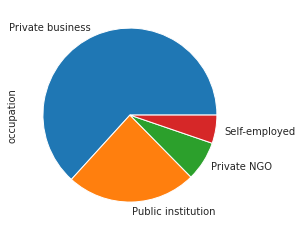

In [41]:
# Change X052 (Occupation code) to occupation, and drop X052

df['occupation'] = None
df.loc[df['X052']==1,'occupation'] ="Public institution"
df.loc[df['X052']==2,'occupation'] ="Private business"
df.loc[df['X052']==3,'occupation'] ="Private NGO"
df.loc[df['X052']==4,'occupation'] ="Self-employed"
df = df.drop(['X052'], axis=1)
df['occupation'].value_counts().plot(kind='pie')

Year


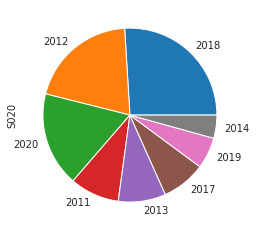

In [42]:
print('Year')
df['S020'].value_counts().plot(kind='pie')

Sex (1 male; 2 female)


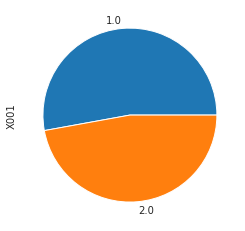

In [43]:
print('Sex (1 male; 2 female)')
df['X001'].value_counts().plot(kind='pie')

Age


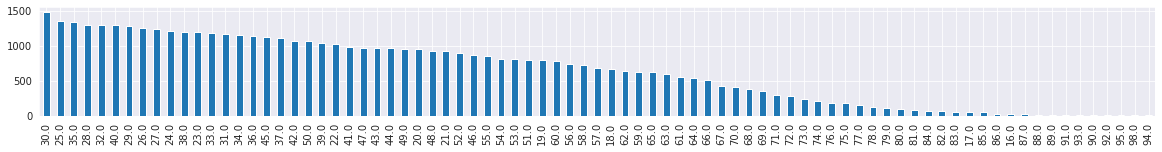

In [44]:
print('Age')
df['X003'].value_counts().plot(kind='bar', figsize=(20,2))

In [45]:
print('The sample has {} features and {} rows of observations.'.format(df.shape[1], df.shape[0]))

The sample has 60 features and 51488 rows of observations.


In [46]:
# data normalization for float, except 'S020' (year), 'country', 'language', and 'occupation'.

cols_except = ['S020', 'country', 'language', 'occupation']
for i in df.columns:
  if i in cols_except:
    continue
  else:
    df[i] = (df[i] - df[i].mean()) / df[i].std()

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
S020,"51,488.000","2,015.864",3.305,"2,011.000","2,012.000","2,017.000","2,018.000","2,020.000"
A008,"51,488.000",-0.000,1.000,-1.131,-1.131,0.285,0.285,3.116
A098,"51,488.000",0.000,1.000,-0.831,-0.831,-0.831,1.520,1.520
A099,"51,488.000",-0.000,1.000,-0.570,-0.570,-0.570,0.835,2.239
A100,"51,488.000",-0.000,1.000,-0.494,-0.494,-0.494,-0.494,2.577
A101,"51,488.000",-0.000,1.000,-0.441,-0.441,-0.441,-0.441,3.039
A102,"51,488.000",-0.000,1.000,-0.432,-0.432,-0.432,-0.432,3.211
A103,"51,488.000",0.000,1.000,-0.394,-0.394,-0.394,-0.394,3.342
A104,"51,488.000",0.000,1.000,-0.453,-0.453,-0.453,-0.453,2.794
A105,"51,488.000",0.000,1.000,-0.470,-0.470,-0.470,-0.470,2.702


In [48]:
# Show a list of variable labels and descriptions (questions)

codebook = pd.read_csv("https://www.dropbox.com/s/yygyqp5yhqvmdiy/Description_Variables_simple.csv?dl=1")
summary = pd.DataFrame(df.describe().T, columns=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']).reset_index()
summary.rename(columns={"index": "variable_code"}, inplace=True)
codebook = codebook.merge(summary, how='inner')
pd.set_option('display.max_colwidth', None)
codebook[['variable_code', 'variable_question']].style.set_properties(**{'text-align': 'left'})

,variable_code,variable_question
0,S020,nan
1,A008,"Taking all things together, would you say you are:"
2,A098,"Now I am going to read out a list of voluntary organizations; for each one, could you tell me whether you are a member, an active member, an inactive member or not a member of that type of organization? Church or religious organization"
3,A099,"Now I am going to read out a list of voluntary organizations; for each one, could you tell me whether you are a member, an active member, an inactive member or not a member of that type of organization? Sport or recreational organization, football/baseball/rugby team"
4,A100,"Now I am going to read out a list of voluntary organizations; for each one, could you tell me whether you are a member, an active member, an inactive member or not a member of that type of organization? Art, music or educational organization"
5,A101,"Now I am going to read out a list of voluntary organizations; for each one, could you tell me whether you are a member, an active member, an inactive member or not a member of that type of organization? Labour Union"
6,A102,"Now I am going to read out a list of voluntary organizations; for each one, could you tell me whether you are a member, an active member, an inactive member or not a member of that type of organization? Political party"
7,A103,"Now I am going to read out a list of voluntary organizations; for each one, could you tell me whether you are a member, an active member, an inactive member or not a member of that type of organization? Environmental organization"
8,A104,"Now I am going to read out a list of voluntary organizations; for each one, could you tell me whether you are a member, an active member, an inactive member or not a member of that type of organization? Professional association"
9,A105,"Now I am going to read out a list of voluntary organizations; for each one, could you tell me whether you are a member, an active member, an inactive member or not a member of that type of organization? Humanitarian or charitable organization"


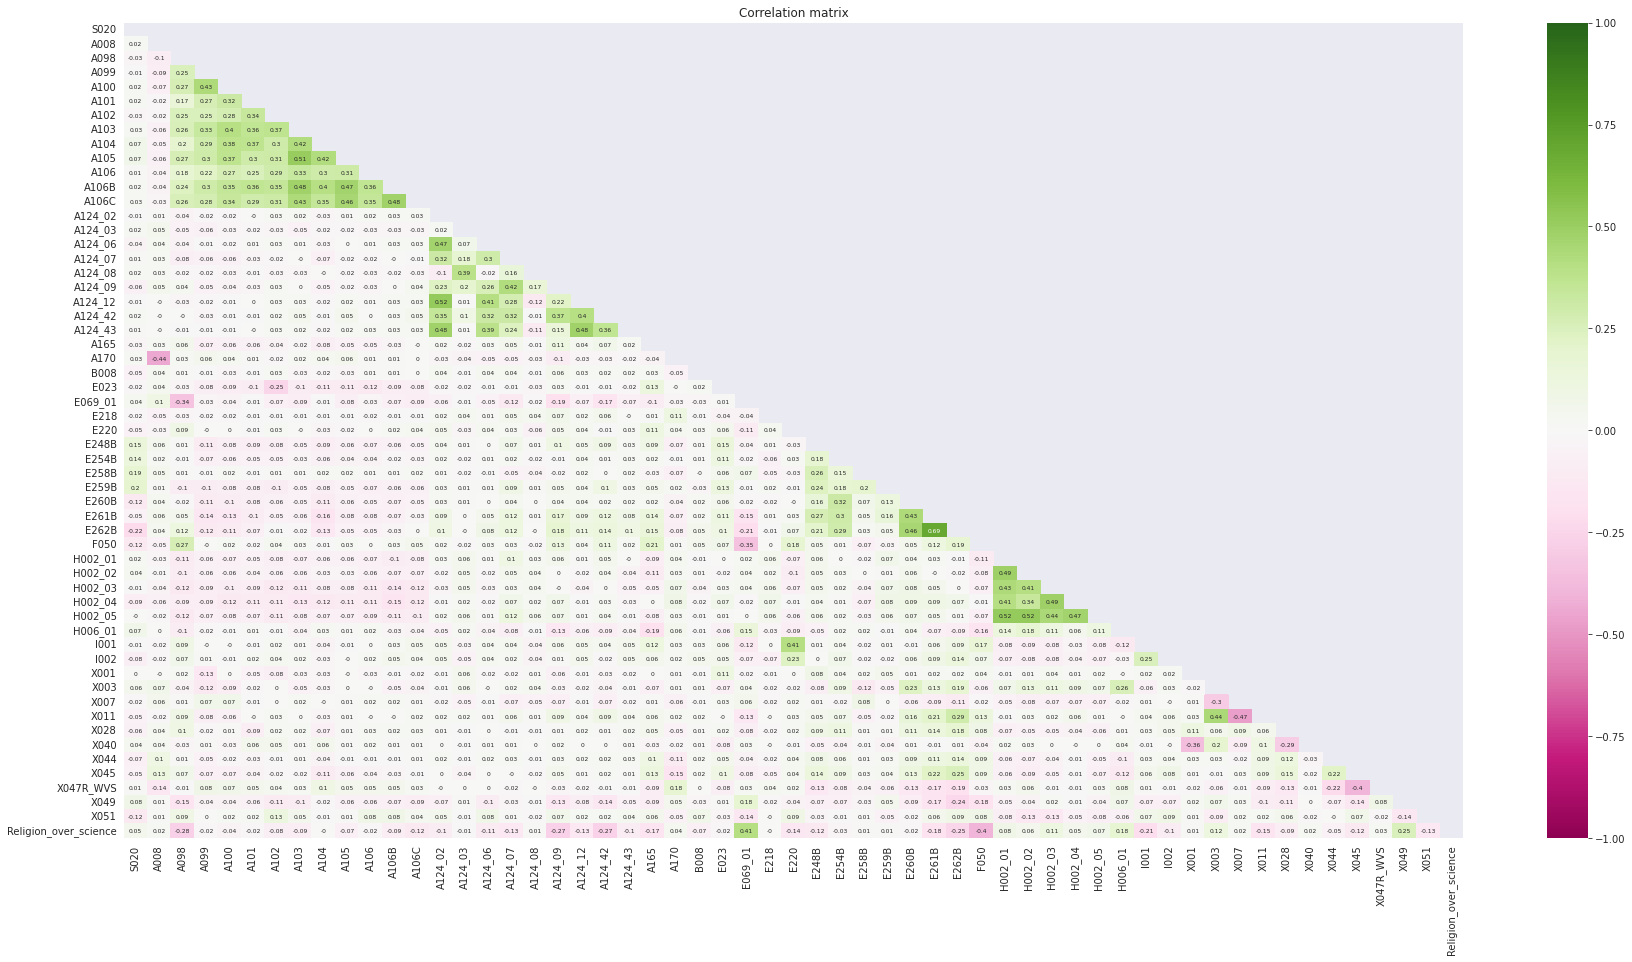

In [49]:
plt.figure(figsize=(30,15))
ax = sns.heatmap(df.corr().round(2), 
                 mask=np.triu(np.ones_like(df.corr().round(2), dtype=bool)),
                 cmap="PiYG", vmax=1, vmin=-1, annot=True, annot_kws={"size":6})
plt.title('Correlation matrix')
plt.show()
plt.close()

In [50]:
from google.colab import files
df.to_csv('data.csv') 
files.download('data.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# **Machine Learning Analysis**
# Preliminary Model 1: OLS of outcome, predicted by dummies of age, sex, year, country, language, and occupation.

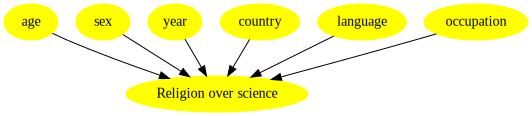

In [62]:
# Conceptual model
import graphviz

g = graphviz.Digraph()

# Yellow for main relationship to be estimated
g.attr('node', style='filled', color='yellow', shape='oval')
for i in ['age', 'sex', 'year', 'country', 'language', 'occupation']:
    g.node(i)
    g.edge(i, 'Religion over science')

g

In [63]:
import statsmodels.formula.api as smf
mod = smf.ols(formula='Religion_over_science ~ 1 + C(S020) + C(country) + C(language) + C(occupation) + X001 + X003', data=df)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     Religion_over_science   R-squared:                       0.382
Model:                               OLS   Adj. R-squared:                  0.381
Method:                    Least Squares   F-statistic:                     256.0
Date:                   Mon, 07 Mar 2022   Prob (F-statistic):               0.00
Time:                           04:09:53   Log-Likelihood:                -58357.
No. Observations:                  49771   AIC:                         1.170e+05
Df Residuals:                      49650   BIC:                         1.180e+05
Df Model:                            120                                         
Covariance Type:               nonrobust                                         
=============================================================================================================================
                                                                coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Intercept                                                    -0.5649      0.562     -1.005      0.315      -1.667       0.537
C(S020)[T.2012]                                              -0.1235      0.038     -3.264      0.001      -0.198      -0.049
C(S020)[T.2013]                                               0.0387      0.056      0.686      0.493      -0.072       0.149
C(S020)[T.2014]                                              -0.1167      0.057     -2.046      0.041      -0.228      -0.005
C(S020)[T.2017]                                              -0.1409      0.046     -3.064      0.002      -0.231      -0.051
C(S020)[T.2018]                                              -0.0908      0.038     -2.361      0.018      -0.166      -0.015
C(S020)[T.2019]                                              -0.0802      0.040     -1.981      0.048      -0.160      -0.001
C(S020)[T.2020]                                              -0.2258      0.041     -5.505      0.000      -0.306      -0.145
C(country)[T.Andorra]                                         1.3911      0.571      2.436      0.015       0.272       2.511
C(country)[T.Argentina]                                       1.0161      0.575      1.768      0.077      -0.110       2.142
C(country)[T.Armenia]                                         0.3813      0.282      1.353      0.176      -0.171       0.934
C(country)[T.Australia]                                       1.2640      0.556      2.273      0.023       0.174       2.354
C(country)[T.Azerbaijan]                                      0.4341      0.282      1.542      0.123      -0.118       0.986
C(country)[T.Bangladesh]                                     -1.1021      0.469     -2.351      0.019      -2.021      -0.183
C(country)[T.Belarus]                                         0.2002      0.832      0.241      0.810      -1.431       1.831
C(country)[T.Bolivia]                                         0.4822      0.574      0.840      0.401      -0.643       1.607
C(country)[T.Brazil]                                          0.3743      0.280      1.337      0.181      -0.174       0.923
C(country)[T.Canada]                                          1.3671      0.557      2.454      0.014       0.275       2.459
C(country)[T.Chile]                                           1.0135      0.571      1.776      0.076      -0.105       2.132
C(country)[T.China]                                           1.8190      0.594      3.060      0.002       0.654       2.984
C(country)[T.Colombia]                                        0.5518      0.570      0.967      0.333      -0.566       1.670
C(country)[T.Cyprus]      

# Preliminary Model 2: LASSO regression, as predicted by one-hot encoded values of year, country, language, and occupation

Metric of evaluation type and justification: We use R-squared as a metric of evaluation. A linear relationship is assumed to exist between the group of independent variables year, country, language, and occupation and the dependent (target) variable Religion_over_science; hence the Lasso regression algorithm will evaluate the data. Lasso regression also lowers complexity and reduces noise in the model. R-squared will show a good measurement of how well the model fits the dependent variables based on the penalties enforced by Lasso regression.

In [53]:
from numpy import mean
from numpy import std
from numpy import absolute
from pandas import read_csv

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.model_selection import KFold

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
......................................................................................................................................................[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    2.0s finished


The model assigned an alpha weight of: 0.0001
R squared training set: 39.28
R squared test set: 38.63


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


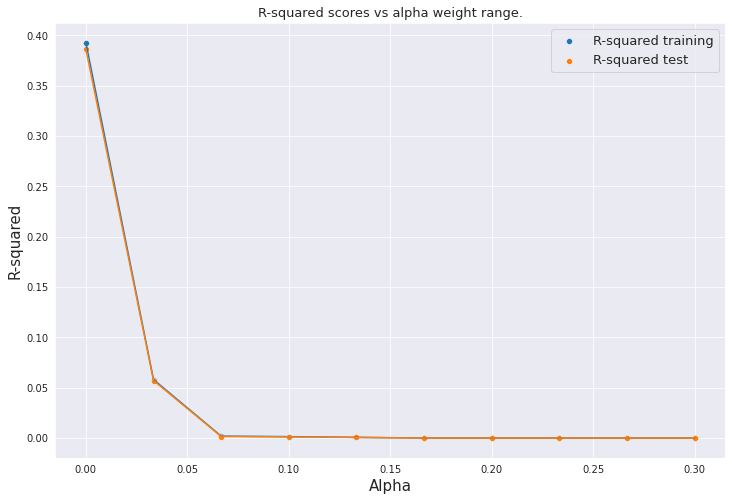

In [54]:
# *** One-hot encode dependent variables. ************************************************

# One-hot encode country.
df_country0 = df[['country']]
df_country1 = pd.get_dummies(df_country0[['country']], prefix='country')

# Add the encoded country column then drop the original country column.
df0 = pd.concat([df,df_country1],axis=1).drop(['country'], axis=1, inplace=False)

# One-hot encode language.
df_language0 = df[['language']]
df_language1 = pd.get_dummies(df_language0[['language']], prefix='language')

# Add the encoded language column then drop the original language column.
df1 = pd.concat([df0,df_language1],axis=1).drop(['language'], axis=1, inplace=False)

# One-hot encode occupation.
df_occupation0 = df[['occupation']]
df_occupation1 = pd.get_dummies(df_occupation0[['occupation']], prefix='occupation')

# Add the encoded occupation column then drop the original occupation column.
df2 = pd.concat([df1,df_occupation1],axis=1).drop(['occupation'], axis=1, inplace=False)

# One-hot encode year (S020).
df_year0 = df[['S020']]
df_year1 = pd.get_dummies(df_year0[['S020']], prefix='S020')

# Add the encoded year (S020) column then drop the original year (S020) column.
df3 = pd.concat([df2,df_year1],axis=1).drop(['S020'], axis=1, inplace=False)

# Extract only the one-hot encoded columns for X.
reg_ex_country = df2.columns.str.contains('country.*')
reg_ex_language = df2.columns.str.contains('language.*')
reg_ex_occupation = df2.columns.str.contains('occupation.*')
reg_ex_year = df2.columns.str.contains('S020.*')

# Select encoded country.
df4 = df2.iloc[:,reg_ex_country]
# Select encoded language.
df5 = df2.iloc[:,reg_ex_language]
# Select encoded occupation.
df6 = df2.iloc[:,reg_ex_occupation]
# Select encoded year.
df7 = df2.iloc[:,reg_ex_year]
# ****************************************************************************************


# *** Define data, train, and evaluate model. ********************************************

# Join all dependent variables.
df8 = pd.concat([df4,df5,df6,df7],axis=1)

# Define features (using independent variables).
X = df8
# Define target (using dependent variable)
y = df['Religion_over_science']

# Define train/test data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1)

# Tuning

# Use 5-fold cross validation for model evaluation.
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)

alpha = np.linspace(0.0001, 0.3, 10)
lasso_cv_model = LassoCV(alphas=alpha, cv=cv, n_jobs=1, verbose=True, random_state=1)
lasso_cv_model.fit(X_train, y_train)

# Sanity Check: Best alpha weight.
print(f'The model assigned an alpha weight of: {lasso_cv_model.alpha_}')

# Use the best alpha value from LassoCV.
lasso_best = Lasso(alpha = lasso_cv_model.alpha_)
lasso_best.fit(X_train, y_train)

# Sanity Check: R-squared scores on training/testing sets.
print('R squared training set:', round(lasso_best.score(X_train, y_train) * 100, 2))
print('R squared test set:', round(lasso_best.score(X_test, y_test) * 100, 2))

r2_train_scores = []
r2_test_scores = []
for i in range(10):
    lasso = Lasso(alpha = alpha[i])
    lasso.fit(X_train, y_train)
    y_train_pred = lasso.predict(X_train)
    y_test_pred = lasso.predict(X_test)
    r2_train_scores.append(r2_score(y_train, y_train_pred))    
    r2_test_scores.append(r2_score(y_test, y_test_pred))   
# ****************************************************************************************


# *** Visualize results, R-squared vs Alpha weights. *************************************

# Plot the R-squared scores with the given range of alpha weights.
fontsize = 13
alpha = np.linspace(0.0001, 0.3, 10)
plt.figure(figsize=(12,8))
plt.title('R-squared scores vs alpha weight range.', fontdict={'fontsize': fontsize})
sns.scatterplot(alpha, r2_train_scores, label='R-squared training')
plt.plot(alpha, r2_train_scores)
sns.scatterplot(alpha, r2_test_scores, label='R-squared test')
plt.plot(alpha, r2_test_scores)
plt.xlabel('Alpha', size=15)
plt.ylabel('R-squared', size=15)
plt.legend(prop={'size': fontsize})
sns.set_style("darkgrid")
plt.show()
# ****************************************************************************************

**Evaluation:**

We observe that as the alpha weight increases, the R-squared score decreases. The coefficients in the regression model display a value closer to zero as the alpha weight increases. This relationship indicates that the observed outcomes of the model decline based on the degree to which the alpha weighting increased.

Furthermore, the regression modeled nearly forty percent of the outcomes at its peak.

Sources:

*   sklearn.linear_model.Lasso. https://scikit-learn.org/stable/modules/generated/
*   sklearn.linear_model.Lasso.html
*   sklearn.model_selection.RepeatedKFold. https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RepeatedKFold.html
*   Lasso and Elastic Net for Sparse Signals. https://scikit-learn.org/stable/auto_examples/linear_model/plot_lasso_and_elasticnet.html#sphx-glr-auto-examples-linear-model-plot-lasso-and-elasticnet-py
*   sklearn.metrics.r2_score. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
*   What is the Difference Between Test and Validation Datasets? Brownlee, Jason. 2017 https://machinelearningmastery.com/difference-test-validation-datasets/
*   Repeated k-Fold Cross-Validation for Model Evaluation in Python. Brownlee, Jason. 2020 https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/

# Preliminary Model 3: Decision Tree

In [55]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics
from sklearn.metrics import classification_report

# For visualizing the tree
from sklearn import tree
from IPython.core.display import Image, display
import pydot
from pydotplus import graph_from_dot_data
from sklearn.tree import export_graphviz
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score

Records prior to cleaning:  51488
Records after cleaning:  49771
Some records are dropped to be compatible with with model
39817 4977 4977


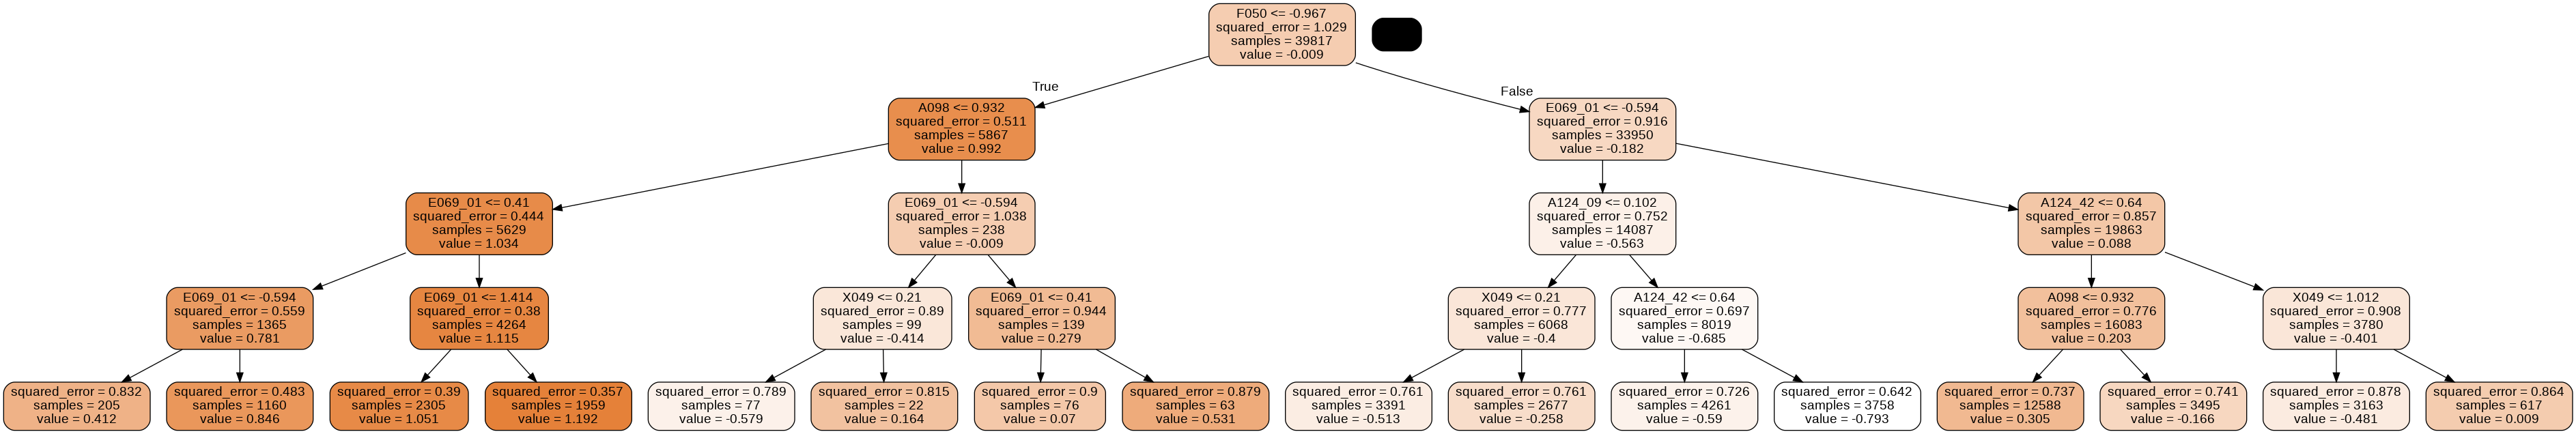

In [56]:
# #Need to clean dataset to be able to be used in decision tree model
df1=df.copy()
print('Records prior to cleaning: ',len(df1))

df1.replace([np.inf, -np.inf], np.nan, inplace=True)
df1 = df1.dropna()

print('Records after cleaning: ',len(df1))
print('Some records are dropped to be compatible with with model')

#Split predictors and labels into separate dataframes

X = df1.drop('Religion_over_science', axis=1)
Y = df1['Religion_over_science']

#Use one hot encoder to transform categorical values

# limit to categorical data using df.select_dtypes()
cat = X.select_dtypes(include=[object])
cat.head(3)

# create a LabelEncoder object and fit it to each feature in X

# 1. INSTANTIATE
# encode labels with value between 0 and n_classes-1.
le = preprocessing.LabelEncoder()

# 2/3. FIT AND TRANSFORM
# use df.apply() to apply le.fit_transform to all columns
X_2 = cat.apply(le.fit_transform)

#create a OneHotEncoder object, and fit it to all of X

# 1. INSTANTIATE
enc = preprocessing.OneHotEncoder()

# 2. FIT
enc.fit(X_2)

# 3. Transform
onehotlabels = enc.transform(X_2).toarray()
onehot_df=pd.DataFrame(onehotlabels)

# merge with main df on key values
X = X.join(onehot_df)

#Remove categorical fields after encoding them
X = X.drop(("language"),axis=1)
X = X.drop(("occupation"),axis=1)
X = X.drop(("country"),axis=1)
X = X.reset_index(drop=True)

#Sample on only a few predictors that have high correlation from correlation matrix above
df_all=X

X=X[["A098","A124_09","A124_42","E069_01","F050","X049"]]

#Assign training, dev and test set to be 80%, 10%, 10% respectively
train_size = round(len(Y)*0.8)
dev_size = round(len(Y)*0.1)
test_size = len(Y) - train_size - dev_size
print(train_size,dev_size,test_size)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[train_size+dev_size:], Y[train_size+dev_size:]
dev_data, dev_labels = X[train_size:train_size+dev_size], Y[train_size:train_size+dev_size]
train_data, train_labels = X[:train_size], Y[:train_size]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

# Train a decision tree classifier
clf = DecisionTreeRegressor(max_depth=4)
clf.fit(train_data, train_labels)

# Output a visualization of it to tree.png
dot_data = tree.export_graphviz(clf, filled=True, rounded=True,
                     class_names=['acceptable', 'unacceptable'], 
                     feature_names=X.columns,
                     out_file=None)
graph = graph_from_dot_data(dot_data)
graph.write_png('tree.png')

# Display tree.png here
Image(filename='tree.png')

In [57]:
#Evaluating results

#Predict using dev data
y_pred = clf.predict(dev_data)

#Determine model score
score=clf.score(dev_data, dev_labels)
print('Model Score: ',round(score,4))

#Return the depth of the decision tree.
print('Depth of tree: ',clf.get_depth())

#Return the number of leaves of the decision tree.
print('Number of leaves: ',clf.get_n_leaves())

#Get parameters for this estimator
print('Model parameters: ',clf.get_params())

#Cross validation score
print('Cross Validation Score: ',cross_val_score(clf, dev_data, dev_labels, cv=10))

Model Score:  0.0654
Depth of tree:  4
Number of leaves:  16
Model parameters:  {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Cross Validation Score:  [ 0.01380084 -0.08344735 -0.03039046  0.02429385  0.00512779  0.14849742
  0.08071411  0.12279631  0.00391463  0.07061016]


In [58]:
#Create decision tree with all fields in dataframe as predictors
X=df_all
X=X.astype(np.float32)
X=X.fillna(0)

#Needed to manually enter the column names or else recieved error in decision tree model
X=X[['S020',
 'A008',
 'A098',
 'A099',
 'A100',
 'A101',
 'A102',
 'A103',
 'A104',
 'A105',
 'A106',
 'A106B',
 'A106C',
 'A124_02',
 'A124_03',
 'A124_06',
 'A124_07',
 'A124_08',
 'A124_09',
 'A124_12',
 'A124_42',
 'A124_43',
 'A165',
 'A170',
 'B008',
 'E023',
 'E069_01',
 'E218',
 'E220',
 'E248B',
 'E254B',
 'E258B',
 'E259B',
 'E260B',
 'E261B',
 'E262B',
 'F050',
 'H002_01',
 'H002_02',
 'H002_03',
 'H002_04',
 'H002_05',
 'H006_01',
 'I001',
 'I002',
 'X001',
 'X003',
 'X007',
 'X011',
 'X028',
 'X040',
 'X044',
 'X045',
 'X047R_WVS',
 'X049',
 'X051',0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126]]

X.columns = X.columns.astype(str)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[train_size+dev_size:], Y[train_size+dev_size:]
dev_data, dev_labels = X[train_size:train_size+dev_size], Y[train_size:train_size+dev_size]
train_data, train_labels = X[:train_size], Y[:train_size]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

# Train a decision tree classifier
clf = DecisionTreeRegressor()
clf.fit(train_data, train_labels)

#Too large to visualize

#Evaluating results - model is poor

#Predict using dev data
y_pred = clf.predict(dev_data)

#Determine model score - coefficient of determination of the prediction
score=clf.score(dev_data, dev_labels)
print('Model Score: ',round(score,4))

#Return the depth of the decision tree.
print('Depth of tree: ',clf.get_depth())

#Return the number of leaves of the decision tree.
print('Number of leaves: ',clf.get_n_leaves())

#Get parameters for this estimator
print('Model parameters: ',clf.get_params())

#Cross validation score
print('Cross Validation Score: ',cross_val_score(clf, dev_data, dev_labels, cv=10))

Model Score:  -1.3209
Depth of tree:  37
Number of leaves:  13587
Model parameters:  {'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': None, 'splitter': 'best'}
Cross Validation Score:  [-0.75092571 -1.13448665 -1.15150564 -1.02672139 -0.78560727 -0.89449852
 -0.72761645 -0.955359   -0.96672129 -1.17899509]


# Preliminary Model 4: Neural Network

In [59]:
from sklearn.neural_network import MLPRegressor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [60]:
# Prepare Data
# For the purposes of this initial analysis, I only used the values that werne't categorical.  Therefore, in the final iteration, we can use more data.
NN_DF = df
X_NN = NN_DF
Y_NN = NN_DF

X_NN = X_NN.drop(("Religion_over_science"), axis =1)
X_NN = X_NN.drop(("language"), axis = 1)
X_NN = X_NN.drop(("occupation"), axis =1)
X_NN = X_NN.drop(("country"), axis =1)
Y_NN = Y_NN['Religion_over_science']

# Training size calculations
train_size = round(len(Y_NN)*0.8)
dev_size = round(len(Y_NN)*0.1)
test_size = len(Y_NN) - train_size - dev_size

print(train_size, dev_size, test_size)

41190 5149 5149


In [61]:
# Assigning respective data to training sizes

test_data, test_labels = X_NN[train_size+dev_size:], Y_NN[train_size+dev_size:]
dev_data, dev_labels = X_NN[train_size:train_size+dev_size], Y_NN[train_size:train_size+dev_size]
train_data, train_labels = X_NN[:train_size], Y_NN[:train_size]

regr = MLPRegressor(random_state=1, max_iter=500).fit(train_data, train_labels)
regr.predict(test_data[:2])
print("Model score:")
regr.score(test_data, test_labels)

Model score:


0.17291893542578374